In [12]:
import os
import numpy as np
import tensorflow as tf
import librosa
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Mel Frequency Cepstral Coefficients (MFCC)
def extract_mfcc(y, sr):
  mfcc = np.array(librosa.feature.mfcc(y=y, sr=sr, n_mels=128, n_mfcc=12, n_fft=512, hop_length=128))
  return mfcc

def extract_melspectrogram(y, sr):
  melspectrogram = np.array(librosa.feature.melspectrogram(y=y, sr=sr))
  return melspectrogram

def extract_chroma_vector(y, sr):
  chroma = np.array(librosa.feature.chroma_stft(y=y, sr=sr))
  return chroma

def extract_spectral_contrast(y, sr):
  tonnetz = np.array(librosa.feature.spectral_contrast(y=y, sr=sr))
  return tonnetz

# tonal centroid features (tonnetz)
def extract_tonnetz(y, sr):
  tonnetz = np.array(librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr))
  return tonnetz

def extract_features(y, sr):
  # Extracting MFCC feature
  mfcc = extract_mfcc(y, sr)
  mfcc_mean = mfcc.mean(axis=1)
  mfcc_min = mfcc.min(axis=1)
  mfcc_max = mfcc.max(axis=1)
  mfcc_feature = np.concatenate( (mfcc_mean, mfcc_min, mfcc_max) )

  # # Extracting Mel Spectrogram feature
  # melspectrogram = extract_melspectrogram(y, sr)
  # melspectrogram_mean = melspectrogram.mean(axis=1)
  # melspectrogram_min = melspectrogram.min(axis=1)
  # melspectrogram_max = melspectrogram.max(axis=1)
  # melspectrogram_feature = np.concatenate( (melspectrogram_mean, melspectrogram_min, melspectrogram_max) )

  # # Extracting chroma vector feature
  # chroma = extract_chroma_vector(y, sr)
  # chroma_mean = chroma.mean(axis=1)
  # chroma_min = chroma.min(axis=1)
  # chroma_max = chroma.max(axis=1)
  # chroma_feature = np.concatenate( (chroma_mean, chroma_min, chroma_max) )

  # # Extracting spectral contrast feature
  # spectral_contrast = extract_spectral_contrast(y, sr)
  # spectral_contrast_mean = spectral_contrast.mean(axis=1)
  # spectral_contrast_min = spectral_contrast.min(axis=1)
  # spectral_contrast_max = spectral_contrast.max(axis=1)
  # spectral_contrast_feature = np.concatenate( (spectral_contrast_mean, spectral_contrast_min, spectral_contrast_max) )

  # # Extracting tonnetz feature
  # tonnetz = extract_tonnetz(y, sr)
  # tonnetz_mean = tonnetz.mean(axis=1)
  # tonnetz_min = tonnetz.min(axis=1)
  # tonnetz_max = tonnetz.max(axis=1)
  # tonnetz_feature = np.concatenate( (tonnetz_mean, tonnetz_min, tonnetz_max) ) 
  
  # features = np.concatenate( (melspectrogram_feature, mfcc_feature, chroma_feature, spectral_contrast_feature, tonnetz_feature) )
  features = mfcc_feature 
  return features

In [14]:
# for i in range(1,11):
#   file_path = f"./training_data/parker/recording_{i}.m4a"


#   mfcc = extract_mfcc(y, sr)
#   pyplot.imshow(mfcc, interpolation='nearest', aspect='auto')
#   pyplot.title("mfcc\n" + file_path)
#   pyplot.show()

#   melspectrogram = extract_melspectrogram(y, sr)
#   pyplot.imshow(melspectrogram, interpolation='nearest', aspect='auto')
#   pyplot.title("melspectrogram\n" + file_path)
#   pyplot.show()

#   chroma_vector = extract_chroma_vector(y, sr)
#   pyplot.imshow(chroma_vector, interpolation='nearest', aspect='auto')
#   pyplot.title("chroma_vector\n" + file_path)
#   pyplot.show()

#   spectral_contrast = extract_spectral_contrast(y, sr)
#   pyplot.imshow(chroma_vector, interpolation='nearest', aspect='auto')
#   pyplot.title("spectral_contrast\n" + file_path)
#   pyplot.show()

#   tonnetz = extract_tonnetz(y, sr)
#   pyplot.imshow(tonnetz, interpolation='nearest', aspect='auto')
#   pyplot.title("tonnetz\n" + file_path)
#   pyplot.show()

temp_max = 1395

directory = "training_data_wav"
speakers = os.listdir(directory)
features = []
labels = []
for speaker in speakers:
    temp_count = 0
    print("=================================| Extracting features for speaker: " + speaker + " |=================================")
    for file in os.listdir(directory + "/" + speaker):
        file_path = directory + "/" + speaker + "/" + file
        print("[" + file_path + "]\n Splitting up audio and extracting features", end="")
        
        sr = librosa.get_samplerate(file_path)
        stream = librosa.stream(file_path, # 2 seconds
                            block_length=1, #frames in each iteration
                            frame_length=int(sr * 0.04), #samples per frame
                            hop_length=int(sr * 0.04)) #"hops" -frames will overlap if hop_length < frame_length
        
        label = speakers.index(speaker)
        
        for y in stream:
            #if temp_count == temp_max and speaker != "other":
            #    break

            #print(".", end="")
            y = (y - min(y)) / (np.max(y) - np.min(y))
            features.append(extract_features(y, sr))
            labels.append(label)
            temp_count += 1
            
        print(" Done!\n")


=================================| Extracting features for speaker: adam |=================================
[training_data_wav/adam/Adam March 3.wav]
 Splitting up audio and extracting features Done!

[training_data_wav/adam/Adam March 8 a.wav]
 Splitting up audio and extracting features Done!

[training_data_wav/adam/Adam March 8 b.wav]
 Splitting up audio and extracting features Done!

[training_data_wav/adam/recording_1.wav]
 Splitting up audio and extracting features Done!

=================================| Extracting features for speaker: aiden |=================================
[training_data_wav/aiden/10 minute recording of aidens voice.wav]
 Splitting up audio and extracting features Done!

[training_data_wav/aiden/5 min recording of aiden AI and humans coexist.wav]
 Splitting up audio and extracting features Done!

[training_data_wav/aiden/8 min recording of aiden ai and insects.wav]
 Splitting up audio and extracting features Done!

=================================| Extract

In [15]:
num_audio_samples = len(features)
num_classes = len(speakers)

# one hot encode our labels
labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes=num_classes)

# randomize our data each time so we aren't training on the exact same set of data
permutations = np.random.permutation(num_audio_samples)
features = np.array(features)[permutations]
labels_one_hot = np.array(labels_one_hot)[permutations]

# data splits
train_split = 0.8
test_split = 0.1
val_split = 0.1

if train_split + test_split + val_split != 1.0:
  raise ValueError("test, train and validation splits should sum to 1.0 (100%)")

# split our data using numpy split. by giving two indices the data is split three ways:
#  - everything before index 1 will be our training data
#  - everything after index 1 and until index 2 will be our test data
#  - everything after index 2 will be our validation data
features_train, features_test, features_val = np.split(features, [int(num_audio_samples * train_split), int(num_audio_samples * (train_split + test_split))])
labels_train, labels_test, labels_val = np.split(labels_one_hot, [int(num_audio_samples * train_split), int(num_audio_samples * (train_split + test_split))])

Display the amounts of each class to see if we have roughly the same amount of data for each.

In [16]:
_, class_counts = np.unique(labels, return_counts=True)

print(class_counts)
print("Class Counts:")
for i in range(len(speakers)):
  print(f"{speakers[i]} - {class_counts[i]}")
print("\nmin - " + str(np.min(class_counts)))
print("max - " + str(np.max(class_counts)))
print("standard deviation - " + str(np.std(class_counts)))


[40959 37420 43433 50632 34874]
Class Counts:
adam - 40959
aiden - 37420
hannah - 43433
other - 50632
parker - 34874

min - 34874
max - 50632
standard deviation - 5439.967742551421


In [17]:
print(features_train.shape)
print(labels_train.shape)

BATCH_SIZE = 32
EPOCHS = 300

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(features_train.shape[1], input_shape=(features_train.shape[1],), activation = "relu"))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(256, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.25))  

model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.25))  

model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))  
  

model.add(tf.keras.layers.Dense(num_classes, activation = "softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
model.summary()



(165854, 36)
(165854, 5)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 36)                1332      
                                                                 
 dropout_4 (Dropout)         (None, 36)                0         
                                                                 
 dense_6 (Dense)             (None, 256)               9472      
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             

In [18]:

# Reduce learning rate when a metric has stopped improving
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                 patience=4, 
                                 verbose=2, 
                                 factor=.75)

# If score doesn't improve, stop learning
estopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                          patience=20, 
                          verbose=2)


history = model.fit(features_train, labels_train, batch_size=BATCH_SIZE, epochs=EPOCHS, 
                    validation_data=(features_val, labels_val),
                    callbacks=[
                      lr_reduction, 
                      estopping
                    ])

Epoch 1/300
5183/5183 [==============================] - 13s 2ms/step - loss: 1.6792 - accuracy: 0.3220 - val_loss: 1.2088 - val_accuracy: 0.4540 - lr: 0.0010
Epoch 2/300
5183/5183 [==============================] - 11s 2ms/step - loss: 1.1543 - accuracy: 0.5030 - val_loss: 1.0147 - val_accuracy: 0.5735 - lr: 0.0010
Epoch 3/300
5183/5183 [==============================] - 11s 2ms/step - loss: 1.0157 - accuracy: 0.5779 - val_loss: 0.8705 - val_accuracy: 0.6554 - lr: 0.0010
Epoch 4/300
5183/5183 [==============================] - 11s 2ms/step - loss: 0.9501 - accuracy: 0.6172 - val_loss: 0.8080 - val_accuracy: 0.6796 - lr: 0.0010
Epoch 5/300
5183/5183 [==============================] - 11s 2ms/step - loss: 0.9147 - accuracy: 0.6341 - val_loss: 0.8175 - val_accuracy: 0.6782 - lr: 0.0010
Epoch 6/300
5183/5183 [==============================] - 12s 2ms/step - loss: 0.8943 - accuracy: 0.6453 - val_loss: 0.7698 - val_accuracy: 0.7041 - lr: 0.0010
Epoch 7/300
5183/5183 [=======================

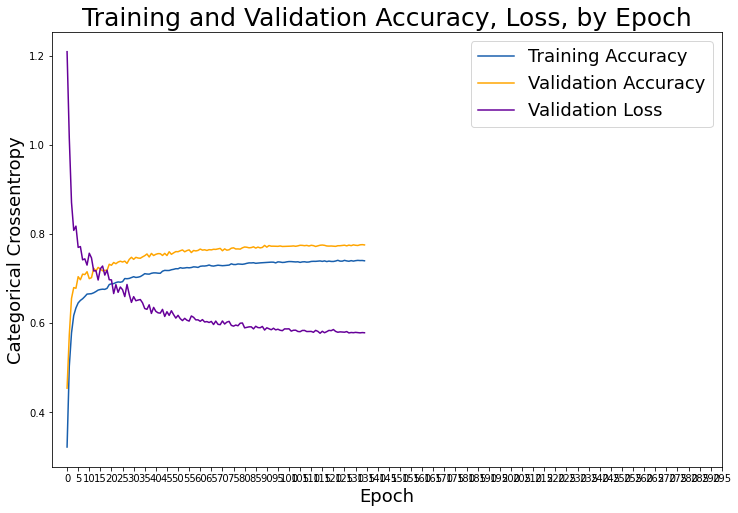

In [19]:
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.plot(val_loss, label='Validation Loss', color="#660099")

# Set title
plt.title('Training and Validation Accuracy, Loss, by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,EPOCHS,5), range(0,EPOCHS,5))

plt.legend(fontsize = 18);

In [20]:
# preds = np.argmax(model.predict(features_test), axis=-1)
# print(np.argmax(labels_test, axis=-1))
# print(preds)
score = model.evaluate(x=features_test.tolist(),y=labels_test.tolist(), verbose=1)
print('Accuracy : ' + str(score[1]*100) + '%')

y_pred = model.predict(features_test)
predictions = np.argmax(labels_test, axis=1) # Convert one-hot to index
classes = np.argmax(y_pred, axis=1)
print(classification_report(predictions, classes))

648/648 [==============================] - 1s 1ms/step - loss: 0.5846 - accuracy: 0.7725
Accuracy : 77.25255489349365%
648/648 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      4085
           1       0.80      0.85      0.82      3741
           2       0.96      0.92      0.94      4347
           3       0.67      0.68      0.67      5080
           4       0.71      0.69      0.70      3479

    accuracy                           0.77     20732
   macro avg       0.77      0.77      0.77     20732
weighted avg       0.77      0.77      0.77     20732



In [21]:
from datetime import datetime
time = datetime.now().strftime("%m_%d_%Y_%H_%M_%S")
model.save(f"../saved_models/{num_classes}_classes-{time}")

INFO:tensorflow:Assets written to: ../saved_models/5_classes-03_21_2023_14_03_12\assets


INFO:tensorflow:Assets written to: ../saved_models/5_classes-03_21_2023_14_03_12\assets
